# Find best hyperparameter settings
The 'best' hyperparamter settings of a dataset can be found by observing performance data of other datasets.

In [1]:
from hyperimp import settings
from scipy.io import arff
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = arff.loadarff('data/meta_svm.arff')
svm = pd.DataFrame(data[0])
data = arff.loadarff('data/meta_random_forest.arff')
rf = pd.DataFrame(data[0])
data = arff.loadarff('data/meta_adaboost.arff')
ada = pd.DataFrame(data[0])

# group svm data by kernel
g = svm.groupby('kernel')

# create dictionary with dataframes per algorithm
alg_names = ['svm_' + s.decode('UTF-8') for s in list(g.groups.keys())] + ['rf', 'ada']
dfs_all = [g.get_group(x) for x in g.groups] + [rf, ada]
dfs = {}
for alg, df in zip(alg_names, dfs_all):
    dfs[alg] = df

# initialize Alg objects
algs = settings.init_algs('data/parameters.csv', dfs)

In [3]:
# find all unique task_id's
task_ids = dfs['rf']['task_id'].unique()

n = 10
m = 40
best_settings = {}

# find 'best' settings for each data set/algorithm combination
for alg in algs:
    for task_id in task_ids:
        #print('\n Task_id: %s, Algorithm: %s' % (str(int(task_id)), alg.name))
        best_settings[(task_id, alg.name)] = settings.find_settings(task_id, alg, n, m)

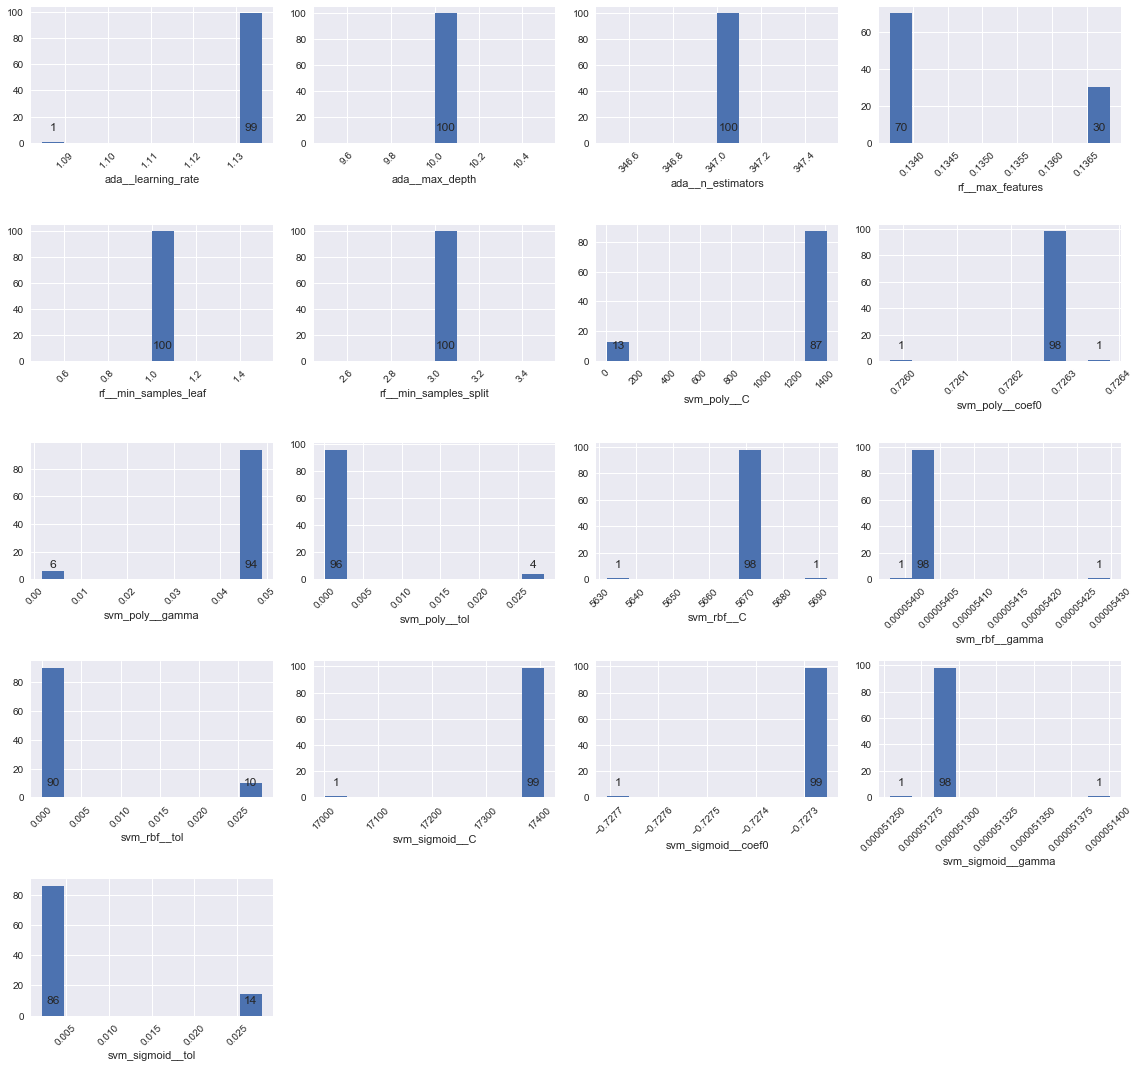

In [24]:
# plot distribution of best parameters
grid = True # put images on grid or not
cols = 4 # set nr columns in figure grid
ymax = None # set upper limit of plot; None for auto

if grid:
    nr_plots = sum([len(alg.params) for alg in algs])
    rows = math.ceil(nr_plots/cols)
    fig = plt.figure(figsize = (4*cols,3*rows))
    index = 0
    for alg in algs:
        alg_settings = pd.DataFrame({k[0] : best_settings[k] for k in best_settings if k[1] == alg.name}).transpose()
        #alg_settings.to_csv('results/best_settings_%s.csv'%(alg.name))
        for column in alg_settings:
            
            #log = next((x for x in alg.params if x.name == column), None).log
            if grid:
                index += 1
                plt.subplot(rows, cols, index)
        
            counts, bins, patches = plt.hist(alg_settings[column], bins = None)
            plt.xlabel('%s__%s' % (alg.name, column))
            plt.xticks(rotation = 45)
            plt.tight_layout()
            
            # Label the raw counts and the percentages below the x-axis...
            bin_centers = 0.5 * np.diff(bins) + bins[:-1]
            for count, x in zip(counts, bin_centers):
                # Label the raw counts
                if count > 0:
                    value = str(int(count))
                else:
                    value = ''
                plt.annotate(value, xy=(x, 0), xycoords=('data', 'axes fraction'),
                    xytext=(0, 20), textcoords='offset points', va='top', ha='center')
                
            if not grid:
                #plt.savefig('figures/best settings/hist__%s__%s.eps' % (alg, column), format = 'eps')
                plt.show()
    if grid:
        plt.show()

Most of the values are very close. Only for **svm_poly_C** and **svm_poly__gamma** there are two bins that can be considered different.

In [ ]:
#Jan's ranges

np.logspace()